
# BboxImage Demo

A `~matplotlib.image.BboxImage` can be used to position an image according to
a bounding box. This demo shows how to show an image inside a `.text.Text`'s
bounding box as well as how to manually create a bounding box for the image.


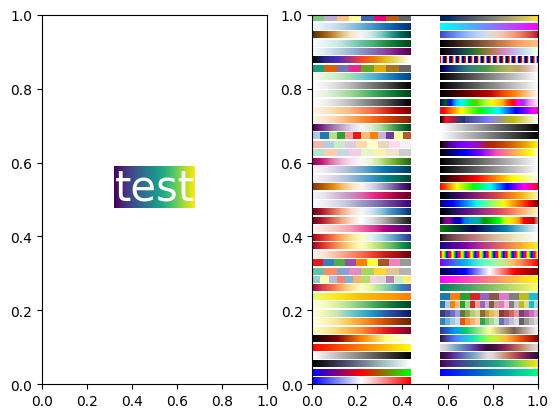

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

fig, (ax1, ax2) = plt.subplots(ncols=2)

# ----------------------------
# Create a BboxImage with Text
# ----------------------------
txt = ax1.text(0.5, 0.5, "test", size=30, ha="center", color="w")
ax1.add_artist(
    BboxImage(txt.get_window_extent, data=np.arange(256).reshape((1, -1))))

# ------------------------------------
# Create a BboxImage for each colormap
# ------------------------------------
# List of all colormaps; skip reversed colormaps.
cmap_names = sorted(m for m in plt.colormaps if not m.endswith("_r"))

ncol = 2
nrow = len(cmap_names) // ncol + 1

xpad_fraction = 0.3
dx = 1 / (ncol + xpad_fraction * (ncol - 1))

ypad_fraction = 0.3
dy = 1 / (nrow + ypad_fraction * (nrow - 1))

for i, cmap_name in enumerate(cmap_names):
    ix, iy = divmod(i, nrow)
    bbox0 = Bbox.from_bounds(ix*dx*(1+xpad_fraction),
                             1 - iy*dy*(1+ypad_fraction) - dy,
                             dx, dy)
    bbox = TransformedBbox(bbox0, ax2.transAxes)
    ax2.add_artist(
        BboxImage(bbox, cmap=cmap_name, data=np.arange(256).reshape((1, -1))))

plt.show()

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.image.BboxImage`
   - `matplotlib.transforms.Bbox`
   - `matplotlib.transforms.TransformedBbox`
   - `matplotlib.text.Text`

